# ECE3200J
Author: Minjie Mao


In [3]:
from scipy import constants as const
import scipy.integrate as integrate
import scipy
import numpy as np
import math

## Chapter 1 The Crystal Structure of Solids
### Basic Crystal Strutures
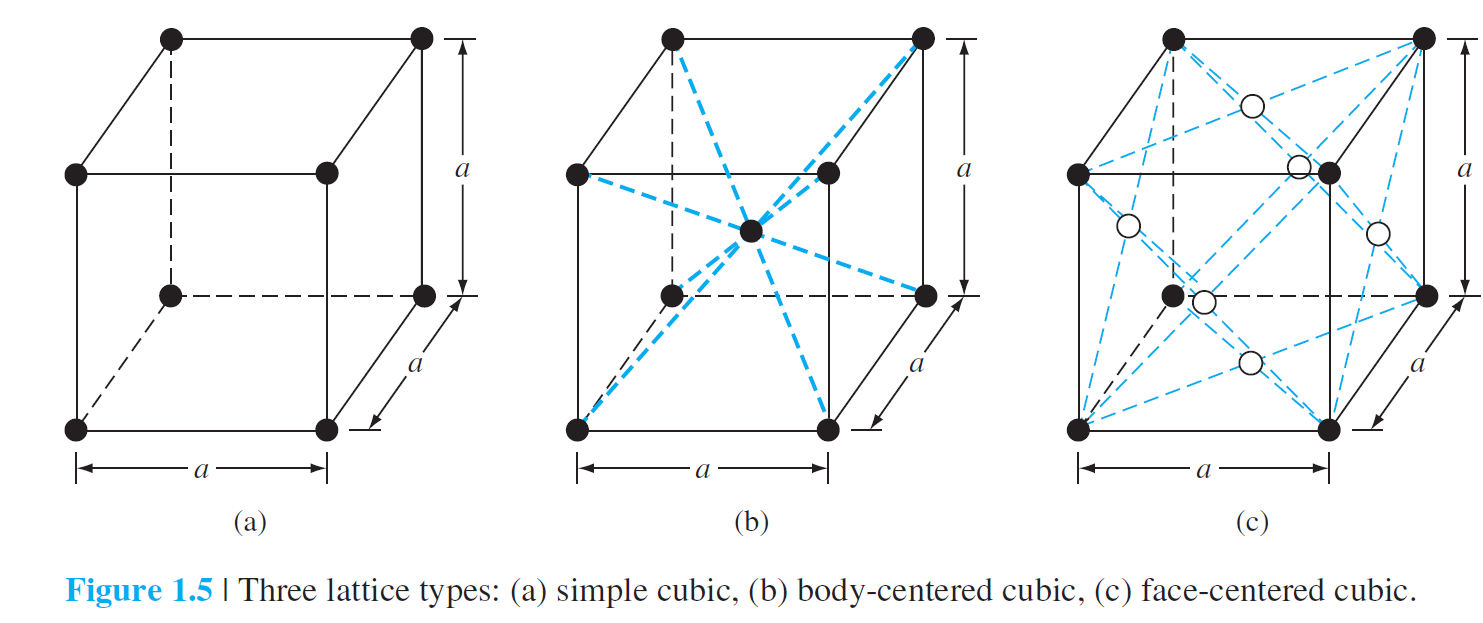

### Miller Indices
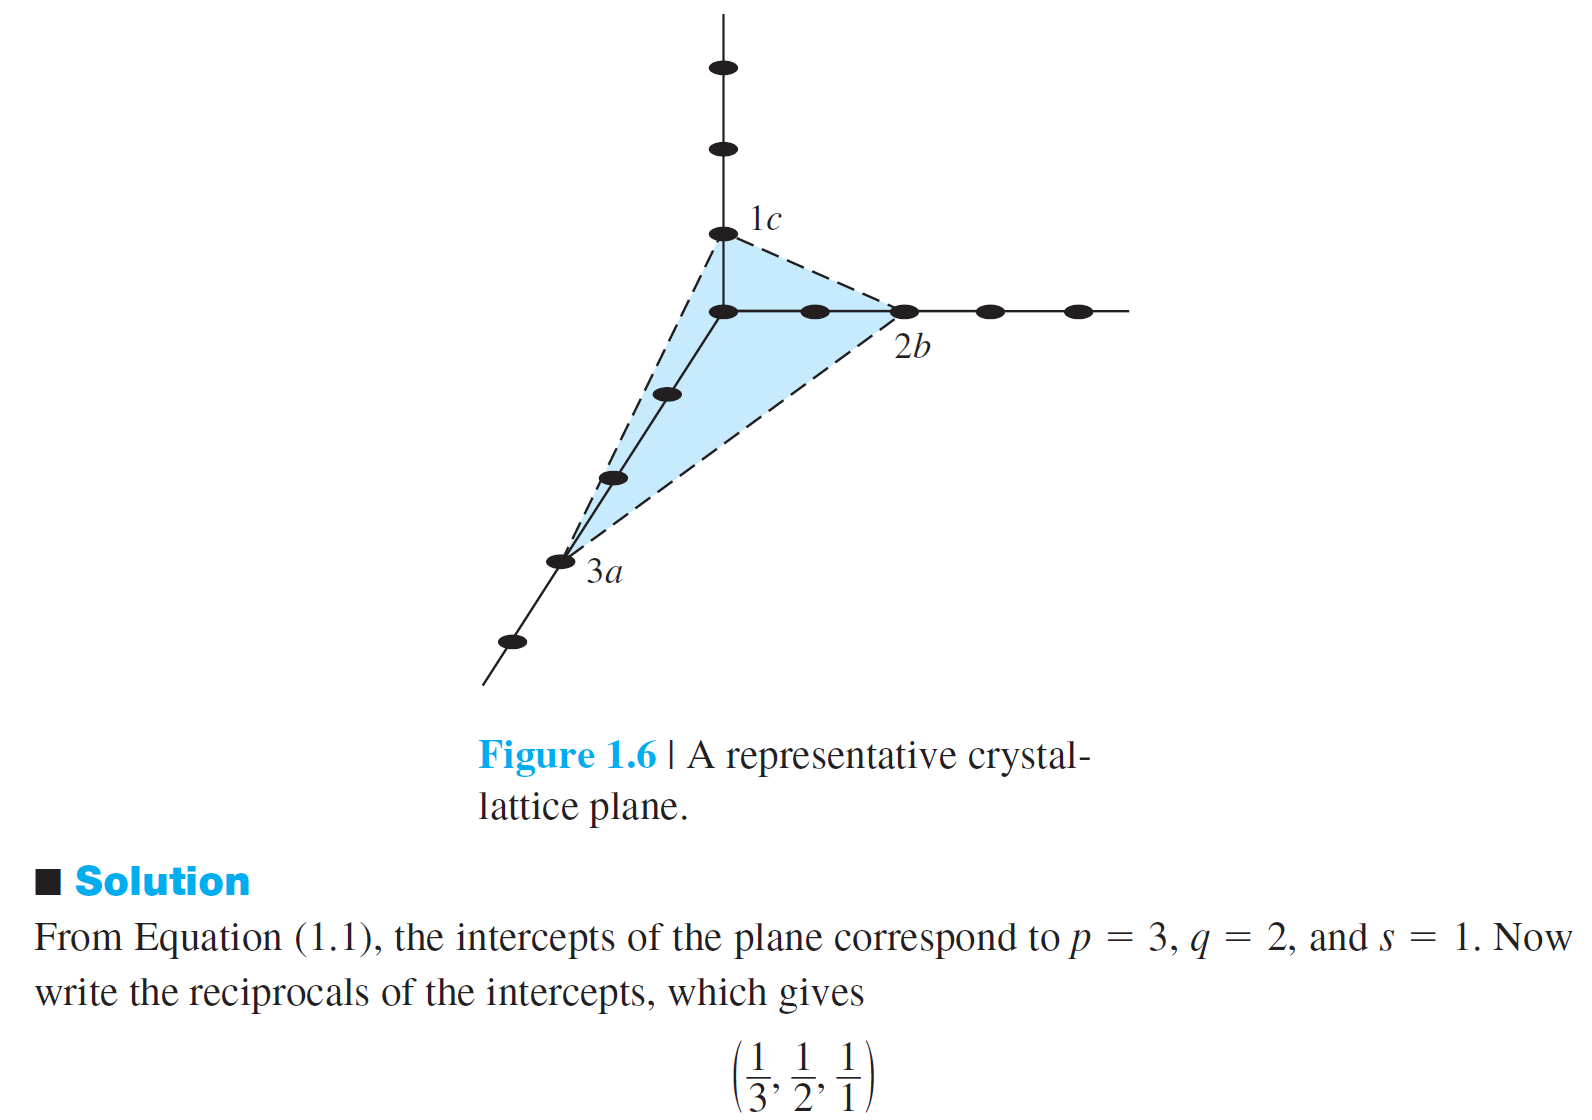

In [4]:
def volume_density(n, side):
    density = n / pow(side, 3)
    print(f"volume density: {density:e}")
    return density

volume_density(1, 1)

volume density: 1.000000e+00


1.0

In [5]:
def surface_density(n, side):
    density = n / pow(side, 2)
    print(f"surface density: {density:e}")
    return density

surface_density(1, 1)

surface density: 1.000000e+00


1.0

### Direction in Crystal
In addition to describing crystal planes in a lattice, we may want to describe a particular
direction in the crystal. The direction can be expressed as a set of three integers
that are the components of a vector in that direction. For example, the body diagonal
in a simple cubic lattice is composed of vector components 1, 1, 1. The body
diagonal is then described as the [111] direction. The brackets are used to designate
direction as distinct from the parentheses used for the crystal planes

## Chapter 2 Introduction to Quantum Mechanics
### Second Order Differential Equations
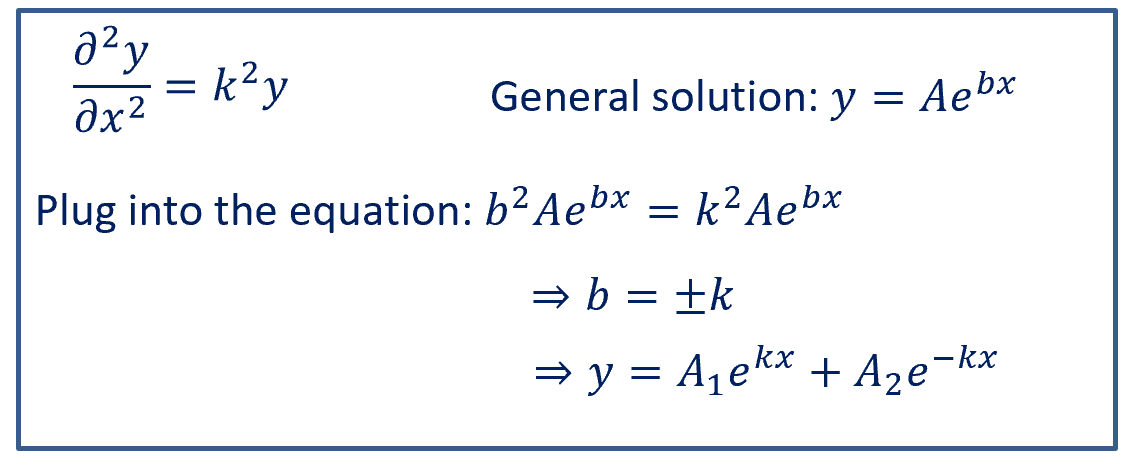
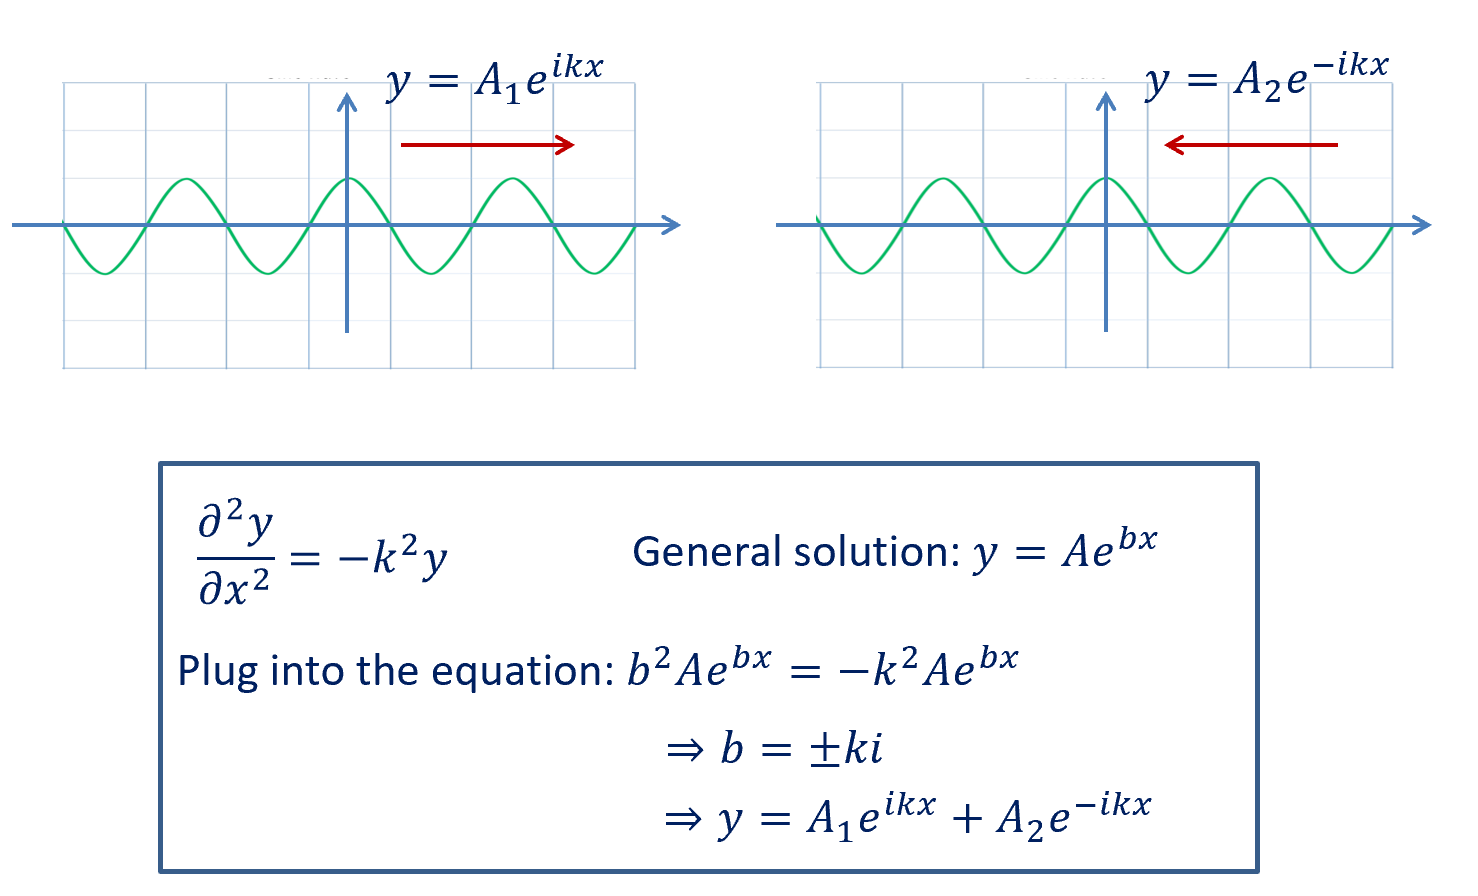
### Principles of Quantum Mechanics
Energy: $$E=h \nu = \hbar \omega$$
Momentum: $$p = mc = \frac{E}{c} = \frac{h \nu}{c} = \frac{h}{\lambda} = \hbar k$$

In [6]:
def energy(nu):
    E = const.h * nu
    print(f"Energy: {E:e}")
    return E

energy(1)

Energy: 6.626070e-34


6.62607015e-34

In [7]:
def nu_lambda(x):
    result = const.c / x
    print(f"If x is lambda, nu: {result:e}; If x is nu, lambda: {result:e};")
    return result

# nu_lambda(3)

def momentum(lamb):
    p = const.h / lamb
    print(f"Momentum: {p:e}")
    return p

# momentum(1)

### Schrodinger's Wave Equation

$$
-\frac{\hbar^2}{2 m} \frac{\partial^2 \Psi}{\partial x^2}+V(x) \Psi=E \Psi
$$

#### Probability Function

$$
|\Psi(x, t)|^2=\psi(x) \psi^*(x)=|\psi(x)|^2
$$

$$
\int ^\infty_{-\infty} |\psi(x)|^2 = 1
$$

**Boundary Condition**

- Condition 1. $\phi (x)$ must be finite, single-valued, and continuous.

- Condition 2. $\frac{\partial \phi (x)}{\partial x}$ must be finite, single-valued, and continuous.

In [8]:
def func(x):
    """function to be integrated
    Args:
        x (float): variable
    """
    A = math.sqrt(2) / 2
    return A ** 2 * (math.cos(math.pi * x) + 1) / 2

# Integrate the function from x to y
integrate.quad(func, 0, 1 / 2)[0]

0.20457747154594774

#### Infinite Potential Well

$$
E=\frac{k^2\hbar^2}{2m}, \quad k = \frac{n \pi}{a}
$$


In [9]:
def energy_level(a):
    """
    Args:
        a: the unit is meter

    Returns:
        E: the unit is J
    """
    n = np.arange(10)
    k = n * np.pi / a
    E = pow(k * const.hbar, 2) / (2 * const.m_e)
    print(f"E: {E}")
    return E 

energy_level(12e-10)

E: [0.00000000e+00 4.18379681e-20 1.67351872e-19 3.76541713e-19
 6.69407489e-19 1.04594920e-18 1.50616685e-18 2.05006044e-18
 2.67762996e-18 3.38887541e-18]


array([0.00000000e+00, 4.18379681e-20, 1.67351872e-19, 3.76541713e-19,
       6.69407489e-19, 1.04594920e-18, 1.50616685e-18, 2.05006044e-18,
       2.67762996e-18, 3.38887541e-18])

## Chapter 3 Introduction to the Quantum Theory of Solids

### Effective Mass

$$
\frac{1}{\hbar} \frac{d E}{d k}=\frac{p}{m}=v
$$

$$
\frac{1}{\hbar^2} \frac{d^2 E}{d k^2}=\frac{2C_1}{\hbar^2}= \frac{1}{m^*}
$$

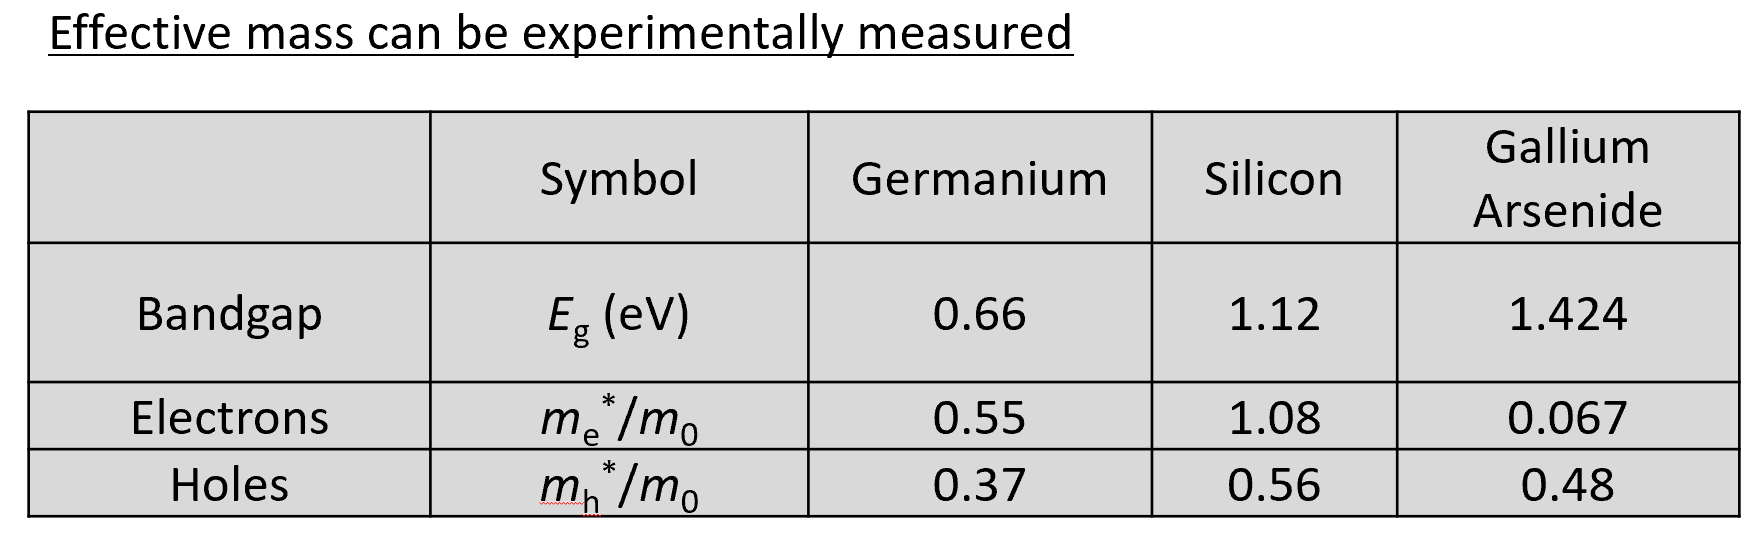

In [10]:
m_e_eff = 1.08 * const.m_e
m_h_eff = 0.56 * const.m_e
m_p_eff = m_h_eff
E_g = 1.12

def effective_mass(C):
    m_eff = const.hbar ** 2 / 2 / C
    print(f"Effective Mass: {m_eff:e}")
    return m_eff

effective_mass(1)

Effective Mass: 5.560609e-69


5.560608592867591e-69

### Density of the States Function

$$
g_c(E)=\frac{4 \pi\left(2 m_n^*\right)^{3 / 2}}{h^3} \sqrt{E-E_c}
$$

$$
g_v(E)=\frac{4 \pi\left(2 m_p^*\right)^{3 / 2}}{h^3} \sqrt{E_v-E}
$$

In [11]:
def state_density(E, m):
    density = 4 * math.pi * pow(2 * m, 3 / 2) / pow(const.h, 3) * math.sqrt(E)
    # print(f"State density: {density:e}")
    return density

integrate.quad(state_density, 0, 3 * const.k * 400, args=m_p_eff)[0]

6.328602773029837e+25

### Statistical Mechanics

#### The Fermi-Dirac Probability Function

The number density $N ( E )$ is the number of particles per unit volume per unit energy
and the function $g ( E )$ is the number of quantum states per unit volume per unit energy.
The function $f_F ( E )$ is called the Fermi–Dirac distribution or probability function
and gives the probability that a quantum state at the energy E will be occupied
by an electron. The energy $E_F$ is called the Fermi energy.

$$
\frac{N(E)}{g(E)}=f_F(E)=\frac{1}{1+\exp \left(\frac{E-E_F}{k T}\right)}
$$

**Maxwell-Boltzmman Approximation**
$$
f_F(E) \approx \exp \left[\frac{-\left(E-E_F\right)}{k T}\right]
$$

In [12]:
def prob(deltaE, T):
    # deltaE = E - E_f, unit: J
    f = 1 / (1 + math.exp(deltaE / (const.k * T)))
    print(f"State probability: {f:e}")
    return f

prob(0.16 * const.e, 300)

def approx_prob(deltaE, T):
    f = math.exp(-deltaE / (const.k * T))
    print(f"Approximate State probability: {f:e}")
    return f

approx_prob(0.16 * const.e, 300)

State probability: 2.047520e-03
Approximate State probability: 2.051721e-03


0.0020517209883802517

## Chapter 4 The Semiconductor in Equilibrium

### Charge Carriers in Semiconductor

We may define a parameter $N_c$ as

$$
N_c=2\left(\frac{2 \pi m_n^* k T}{h^2}\right)^{3 / 2}
$$

The parameter $m_n^*$ is the density of states effective mass of the electron. The thermal equilibrium electron concentration in the conduction band can be written as

$$
n_0=N_c \exp \left[\frac{-\left(E_c-E_F\right)}{k T}\right]
$$

We may define a parameter $N_v$ as

$$
N_v=2\left(\frac{2 \pi m_p^* k T}{h^2}\right)^{3 / 2}
$$

which is called the effective density of states function in the valence band. The parameter $m_p^*$ is the density of states effective mass of the hole. The thermal equilibrium concentration of holes in the valence band may now be written as

$$
p_0=N_v \exp \left[\frac{-\left(E_F-E_v\right)}{k T}\right]
$$

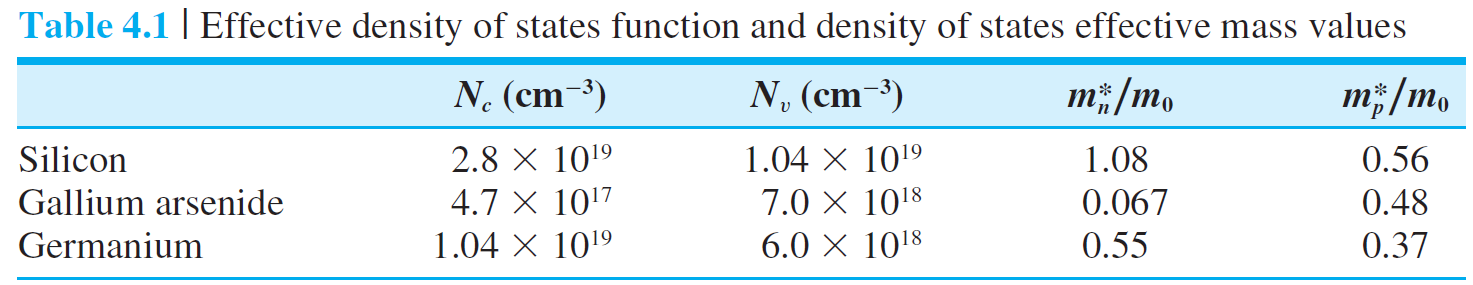

$$
n_i^2=N_c N_v \exp \left[\frac{-\left(E_c-E_v\right)}{k T}\right]=N_c N_v \exp \left[\frac{-E_g}{k T}\right]
$$

where $E_g$ is the bandgap energy. For a given semiconductor material at a constant temperature, the value of $n_i$ is a constant, and independent of the Fermi energy.

**The intrinsic Fermi Energy Position**

$$
E_{F i}-E_{\text {midgap }}=\frac{3}{4} k T \ln \left(\frac{m_p^*}{m_n^*}\right)
$$

### The Extrinsic Semiconductor

$$
n_0=n_i \exp \left[\frac{E_F-E_{F i}}{k T}\right]
$$

$$
p_0=n_i \exp \left[\frac{-(E_F-E_{F i})}{k T}\right]
$$

$$
n_0 \cdot p_0 = n_i^2
$$

In [13]:
N_c = 2.8e19
N_v = 1.04e19
E_g = 1.12
n_i=1.5e10

def get_n0(E_c, E_F, T=300, N_c=2.8e19):
    n_0 = N_c * math.exp(-(E_c - E_F) / (const.k * T))
    print(f"n_0: {n_0:e}")
    return n_0

# def get_n0(p_0, n_i=1.5e10):
#     n_0 = n_i ** 2 / p_0
#     print(f"n_0: {n_0:e}")
#     return n_0

get_n0(0.922 * const.e, 0)

def get_p0(E_v, E_F, T=300, N_v=1.04e19):
    p_0 = N_v * math.exp(-(E_F - E_v) / (const.k * T))
    print(f"p_0: {p_0:e}")
    return p_0

get_p0(0.922 * const.e, 0)


n_0: 9.083218e+03
p_0: 3.205912e+34


3.20591223466167e+34

In [14]:
def get_deltaE(x, T=300):
    deltaE = const.k * T * math.log(x) / const.e
    print(f"deltaE: {deltaE:e}")
    return deltaE
get_deltaE(4e16 / n_i)
print(f"{n_i:e}")

deltaE: 3.825150e-01
1.500000e+10


In [15]:
def E_fi_position(x, T=300):
    diff = 3 * get_deltaE(x, T) / 4
    print(f"E_fi- E_mid: {diff:e}")
    print(diff)

### Statistics of Donors and Acceptors

$$
n_d=\frac{N_d}{1+\frac{1}{2} \exp \left(\frac{E_d-E_F}{k T}\right)} = N_d - N_d^+
$$

$$
p_a=\frac{N_a}{1+\frac{1}{g} \exp \left(\frac{E_F-E_a}{k T}\right)}=N_a-N_a^{-}
$$

### Charge Neutrality

The charge neutrality condition is expressed by equating the density of negative charges to the density of positive charges. We then have

$$
n_0+N_a^{-}=p_0+N_d^{+}
$$

or

$$
n_0+\left(N_a-p_a\right)=p_0+\left(N_d-n_d\right)
$$

**Thermal-Equilibrium Electron Concentration**

$$
n_0^2-\left(N_d-N_a\right) n_0-n_i^2=0
$$

The electron concentration $n_0$ can be determined using the quadratic formula, or

$$
n_0=\frac{\left(N_d-N_a\right)}{2}+\sqrt{\left(\frac{N_d-N_a}{2}\right)^2+n_i^2}
$$

### Position of Fermi Energy Level

$$
E_F- E_{F i}= k T \ln \left(\frac{n_0}{n_i}\right)
$$

$$
E_{F i} - E_F = k T \ln \left(\frac{p_0}{n_i}\right)
$$

In [16]:
def get_ni(n_0, N_d, N_a):
    n_i = math.sqrt(pow(n_0, 2) - (N_d - N_a) * n_0)
    print(f"n_i: {n_i:e}")
    return n_i

def get_T(n_i, E_g=1.12, N_c=2.8e19, N_v=1.04e19):
    T = np.linspace(200, 700, num=int(1e5))
    result = T[np.abs(pow(n_i, 2) - N_c * N_v * (T / 300) ** 3 * np.exp(-E_g * const.e / (const.k * T))).argmin()]
    print(f"T: {result:e}")
    return result

get_T(math.sqrt(5.54e28))

T: 5.384584e+02


538.4583845838458

## Chapter 5 Carrier Transport Phenomena

### Carrier Drift

Since both electrons and holes contribute to the drift current, the total drift current density is the sum of the individual electron and hole drift current densities, so we may write

$$
J_{d r f}=e\left(\mu_n n+\mu_p p\right) \mathrm{E}
$$

The reciprocal of conductivity is resistivity, which is denoted by $\rho$ and is given in units of ohm-cm. We can write the formula for resistivity as

$$
\rho=\frac{1}{\sigma}=\frac{1}{e\left(\mu_n n+\mu_p p\right)}
$$

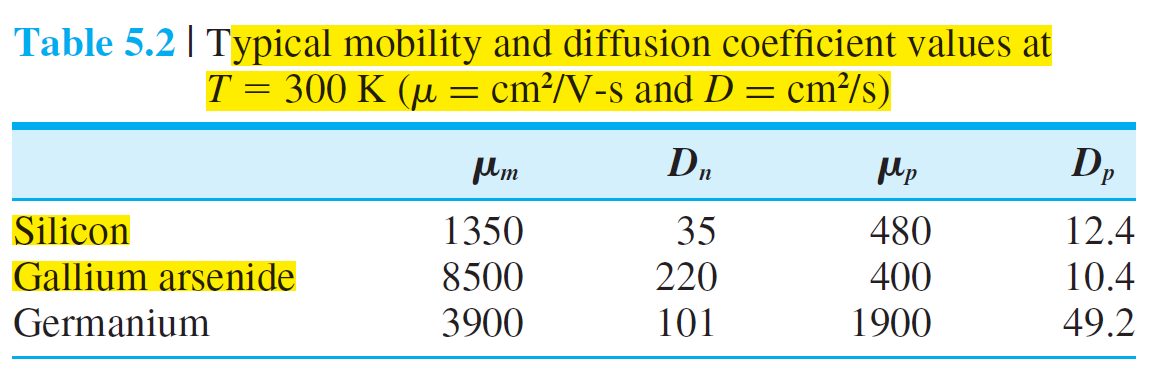
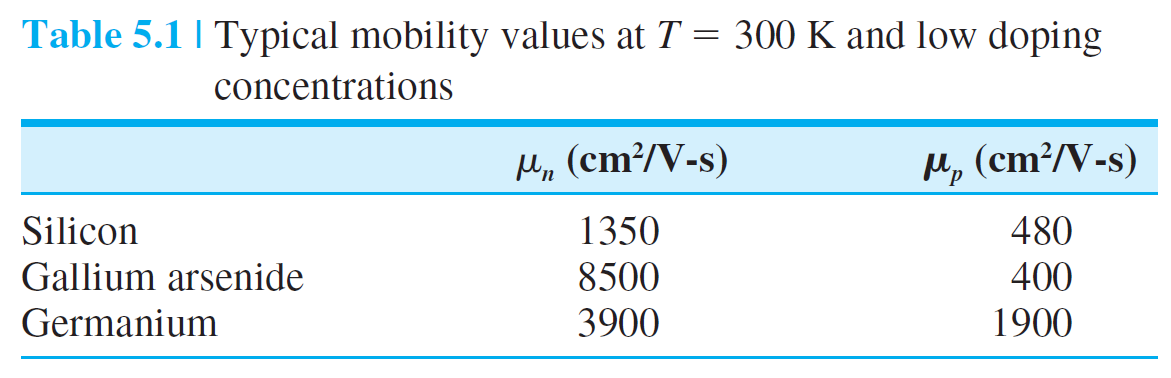

In [17]:
mobility_n = 1350
mobility_p = 480

def drift(n, p, E):
    J = const.e * (mobility_n * n + mobility_p * p) * E
    print(f"Drift current: {J:e}")
    return J

def mid2_1a():
    p = 1.2 / const.e / 400
    print(f"{p:e}")
mid2_1a()

1.872453e+16


### Carrier Diffusion
We may write the electron diffusion current density for this onedimensional case, in the form
$$
J_{n x \mid d i f}=e D_n \frac{d n}{d x}
$$
where $D_n$ is called the electron diffusion coefficient, has units of $\mathrm{cm}^2 / \mathrm{s}$, and is a positive quantity. 

Similarly, we have

$$
J_{p x \mid d i f}=-e D_p \frac{d p}{d x}
$$

The total current density is given by

$$
J=e n \mu_n \mathrm{E}+e p \mu_p \mathrm{E}+e D_n \nabla n-e D_p \nabla p
$$

In [18]:
# midterm2 1b
const.e * 25 * 6e17

2.4032649509999997

### Graded Impurity Distribution

**Induced Electric Field**

$$
\mathrm{E}_x=-\left(\frac{k T}{e}\right) \frac{1}{N_d(x)} \frac{d N_d(x)}{d x}
$$

**Einstein Relation**

$$
\frac{D_n}{\mu_n}=\frac{D_p}{\mu_p}=\frac{k T}{e}
$$

In [19]:
Dn = const.k * 300 / const.e * 1200
print(Dn)
Dp = const.k * 300 / const.e * 400
print(Dp)

31.02239974372264
10.340799914574214


## Chapter 6 Nonequilibrium Excess Carriers in Semiconductors

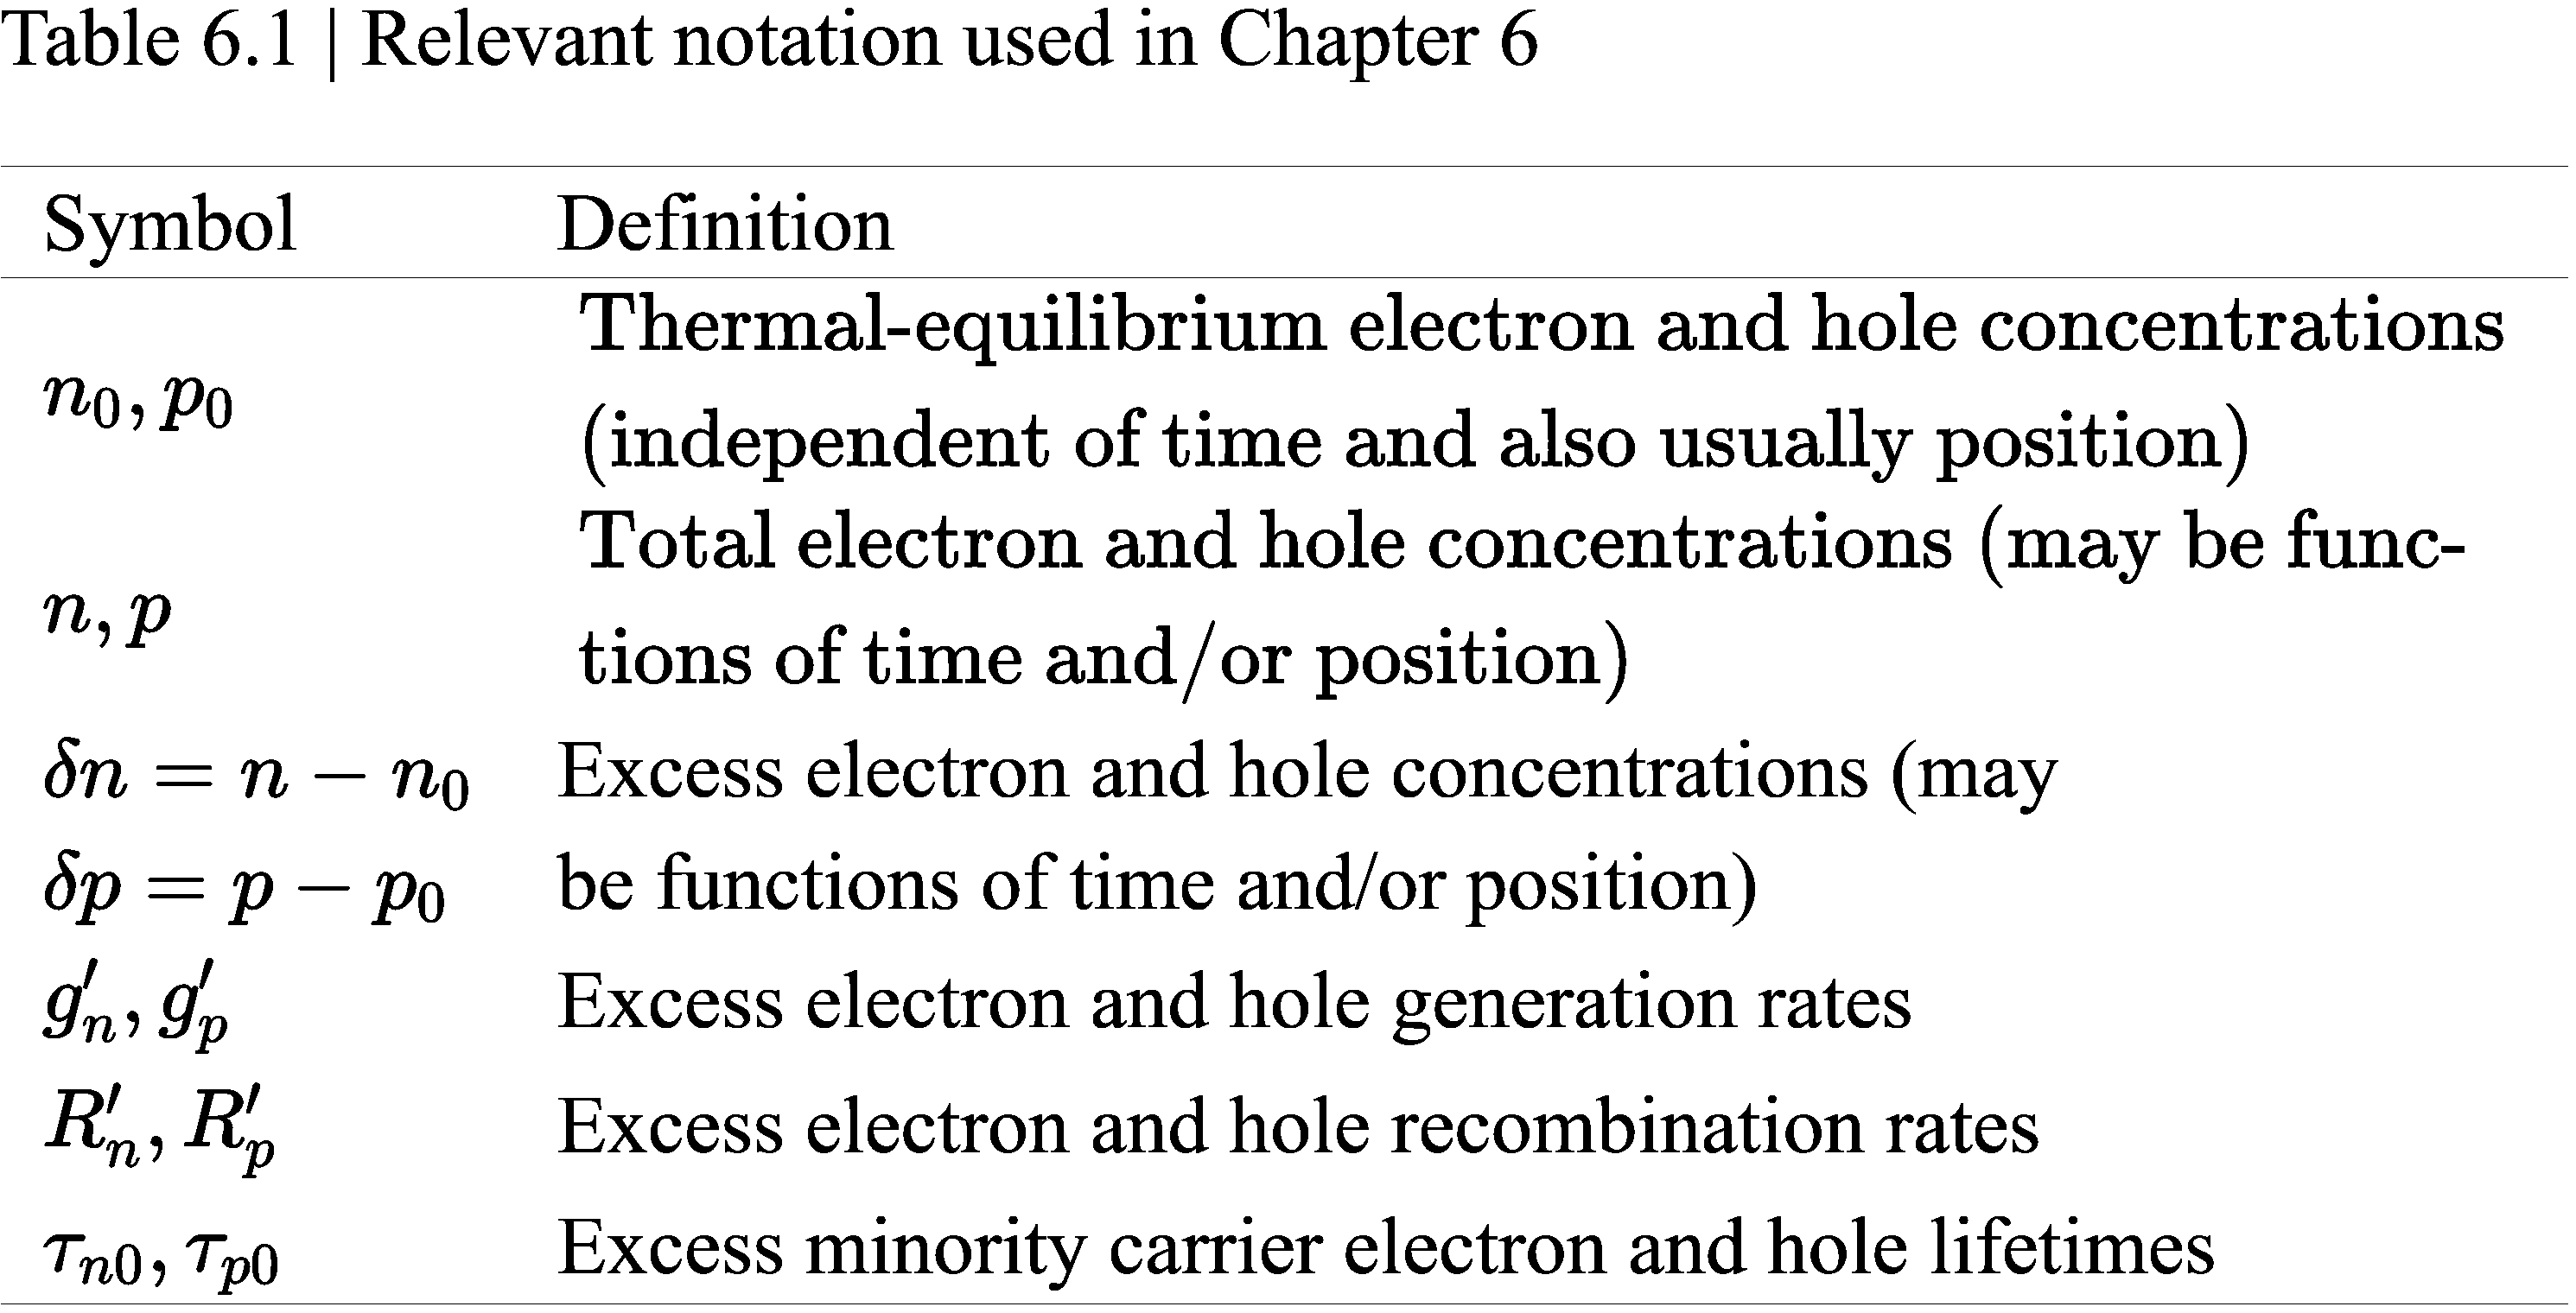

### Excess Carrier Generation and Recombination

For n-type doped semiconductor, we care about $\delta p(t)=\delta p(0) e^{\frac{-t}{\tau_{p 0}}}$ with $\tau_{p 0}=\frac{1}{\alpha_r n_0}$.

For n-type doped semiconductor, we care about $\delta n(t)=\delta n(0) e^{\frac{-t}{\tau_{n 0}}}$ with $\tau_{n 0}=\frac{1}{\alpha_r p_0}$.

For minority carriers in n-type semiconductor:

$$
\frac{d(\delta p)}{d t}=D_p \frac{d^2 p}{d x^2}-\mu_p\left(E \frac{d p}{d x}+p \frac{d E}{d x}\right)-R_p^{\prime}+g_p^{\prime}, \; \text{where} \; R_p^{\prime}=\frac{\delta p}{\tau_{p 0}}.
$$

Majority carriers:

$$
\frac{d(\delta n)}{d t}=D_n \frac{d^2 n}{d x^2}+\mu_n\left(E \frac{d n}{d x}+n \frac{d E}{d x}\right)-R_n^{\prime}+g_n^{\prime}
$$

with $R_p^{\prime}=R_n^{\prime}=\frac{\delta p}{\tau_{p 0}}$ and $g_n=g_p$.

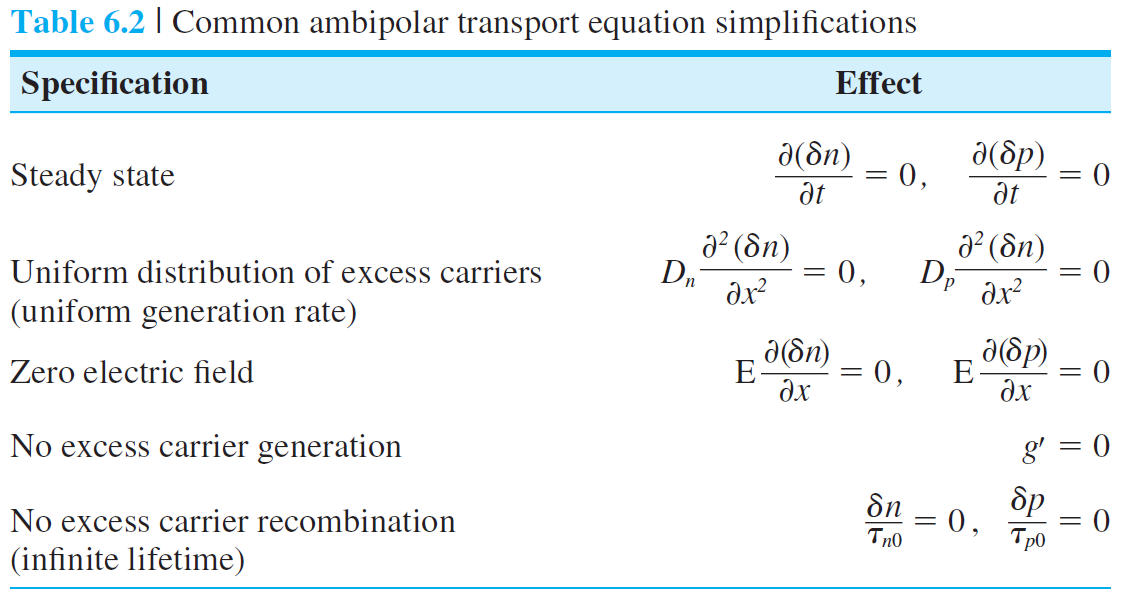

#### Four Models
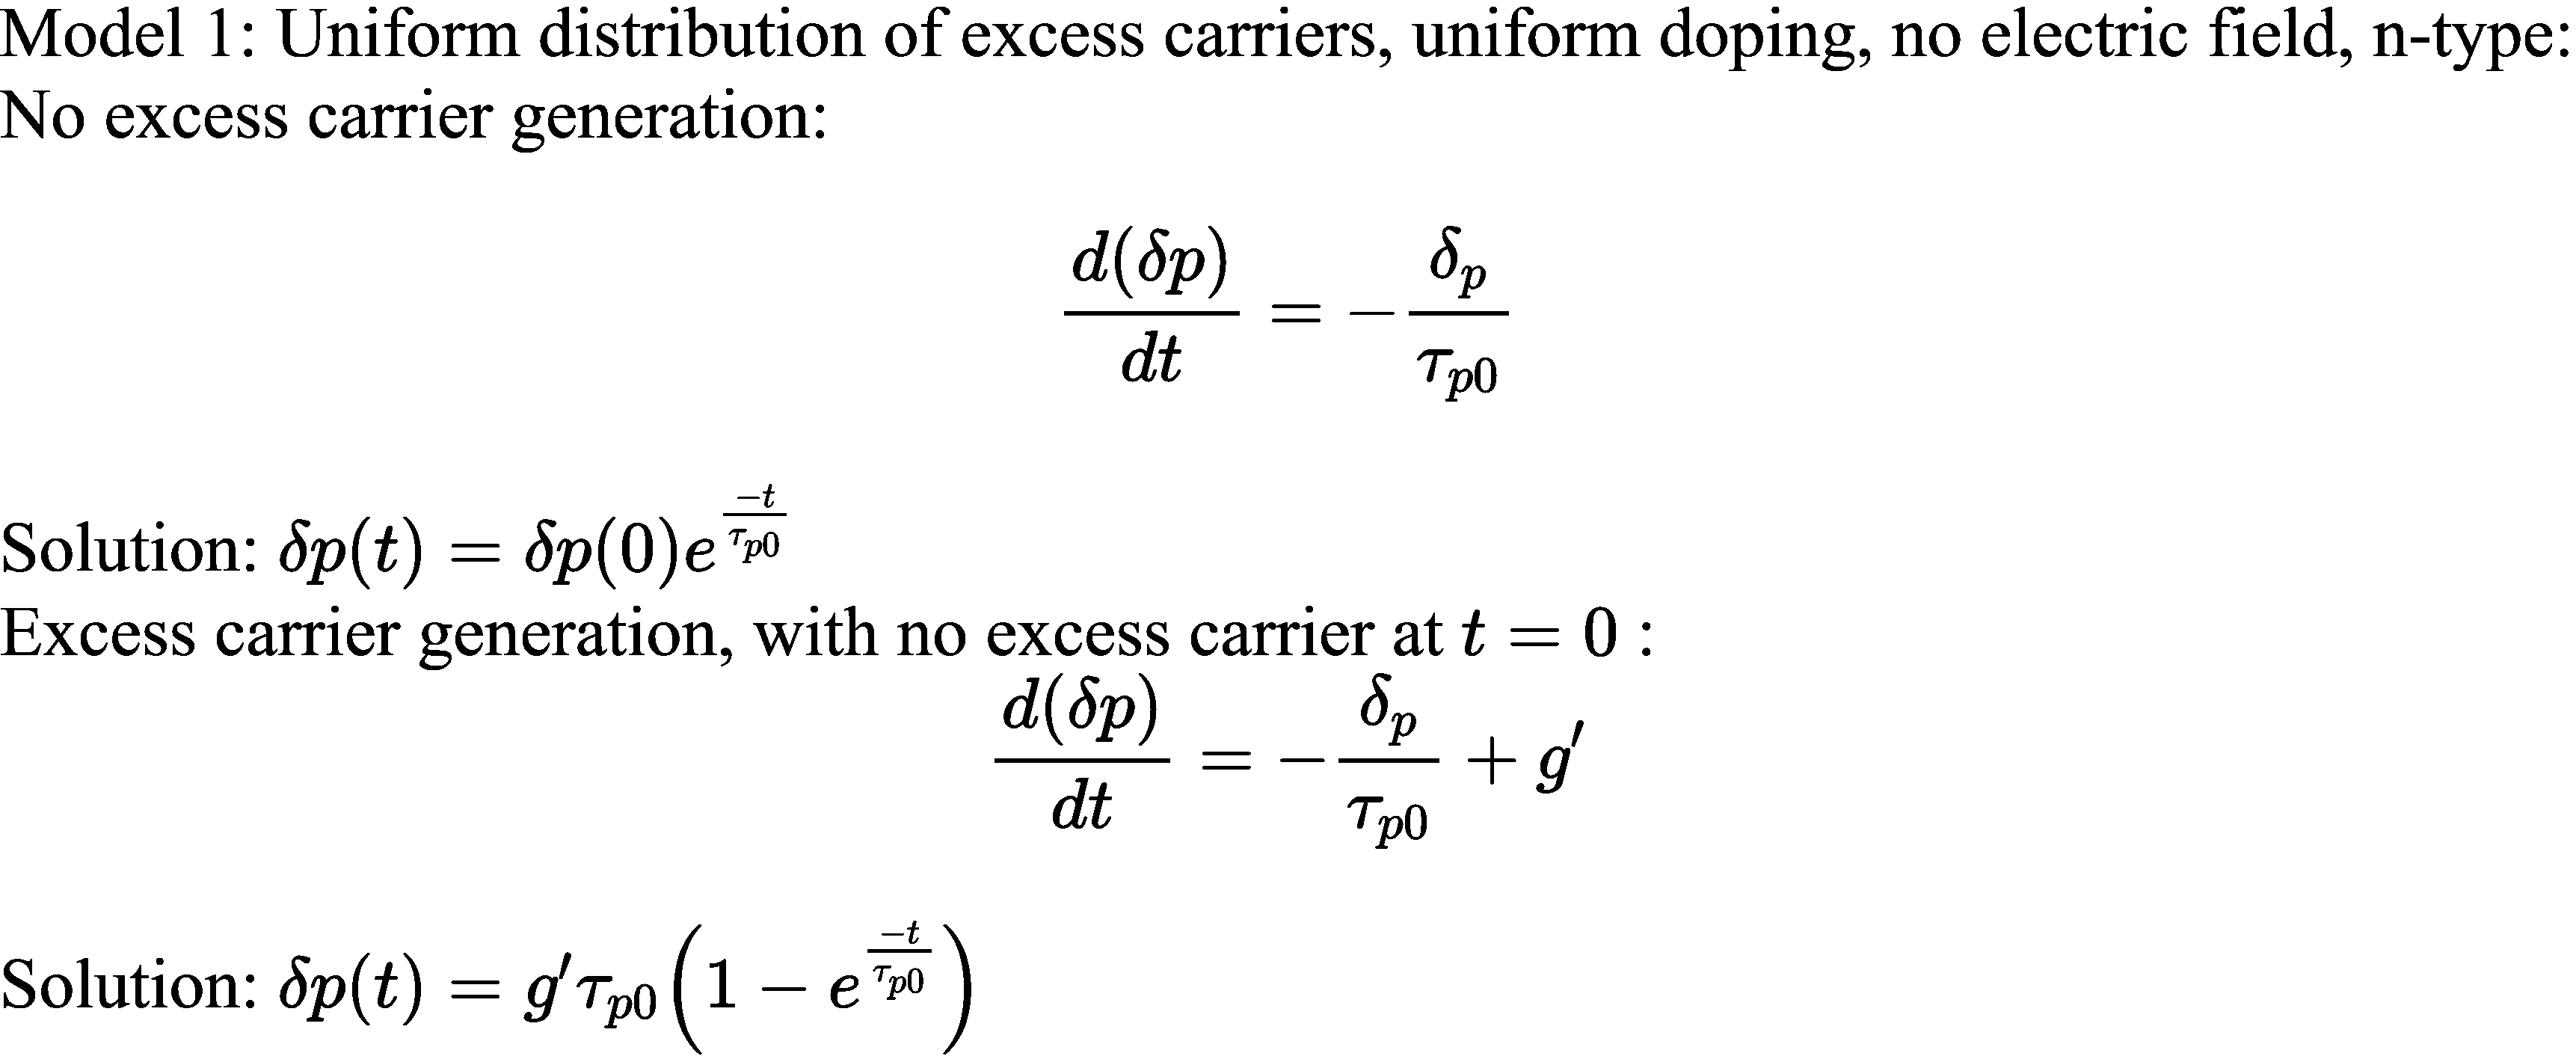
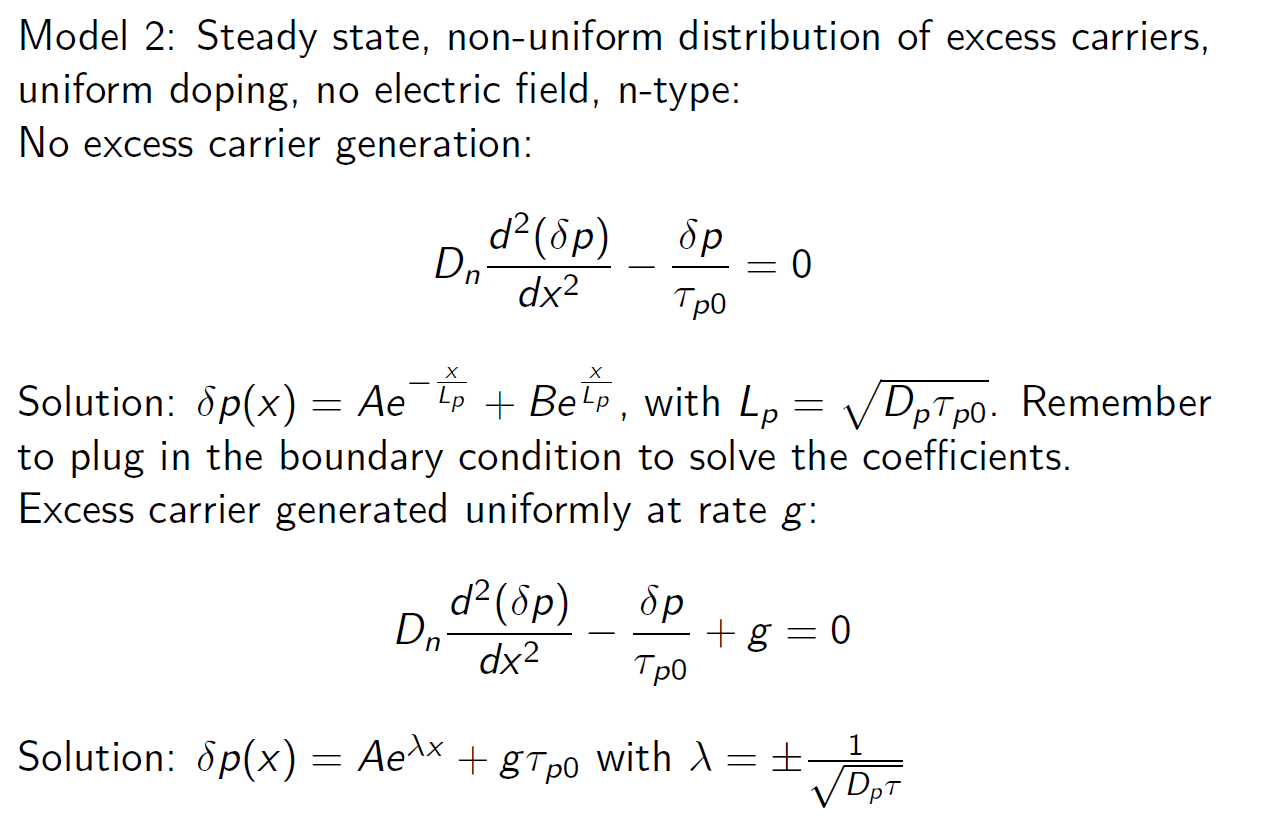
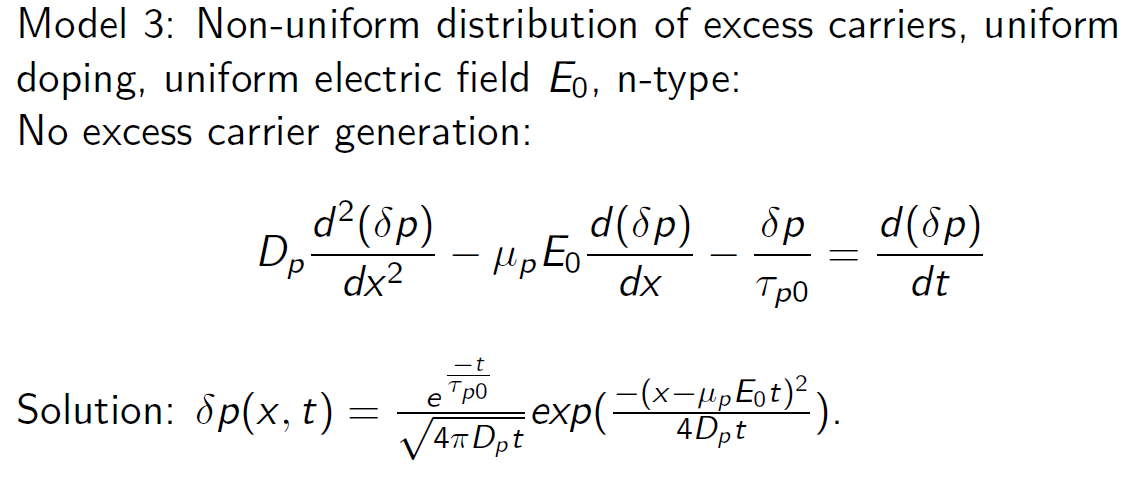
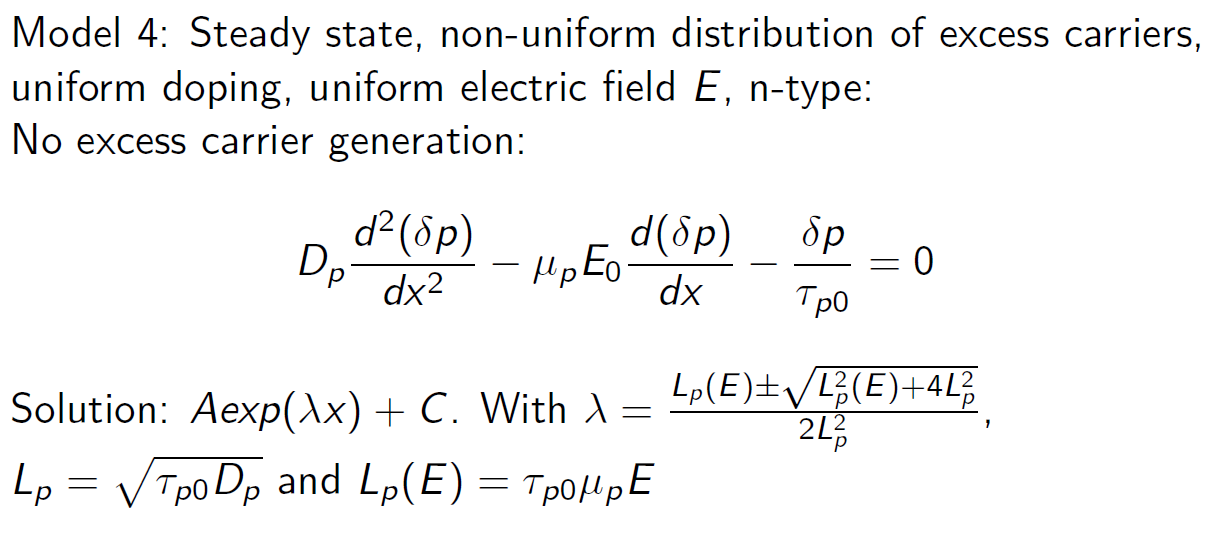


In [20]:
print(f"{1/ math.sqrt(31.02 * 1e-6):e}")
a = const.e  * 31.02 * (-180) * 1e14
print(f"{a:e}")

1.795474e+02
-8.945913e-02


### Quasi-Fermi Energy Levels

$$
n_0+\delta n=n_i \exp \left(\frac{E_{F n}-E_{F i}}{k T}\right) \\
p_0+\delta p=n_i \exp \left(\frac{E_{F i}-E_{F p}}{k T}\right)
$$

### Excess Carrier Lifetime

$$
\begin{gathered}
R_n=R_p=\frac{C_n C_p N_t\left(n p-n_i^2\right)}{C_n\left(n+n^{\prime}\right)+C_p\left(p+p^{\prime}\right)}  = \frac{\left(n p-n_i^2\right)}{\tau_{p_0}\left(n+n^{\prime}\right)+\tau_{n_0}\left(p+p^{\prime}\right)}\\
n^{\prime}=N_c \exp \left(-\frac{-\left(E_c-E_t\right)}{k T}\right) \\
p^{\prime}=N_v \exp \left(-\frac{-\left(E_t-E_v\right)}{k T}\right)
\end{gathered}
$$

### Surface Recombination Velocity

$$
-\left.D_p\left[\hat{n} \cdot \frac{d(\delta p)}{d x}\right]\right|_{\mathrm{surf}}=\left.s \delta p\right|_{\mathrm{surf}}
$$

$\hat{n}$ is the unit outward vector normal to the surface.

## Chapter 7 The PN Junction

### Zero Applied Bias

**Built-in Potential Barrier**

$$
V_{b i}=\frac{k T}{e} \ln \left(\frac{N_a N_d}{n_i^2}\right)=V_t \ln \left(\frac{N_a N_d}{n_i^2}\right)
$$
where $V_t=k T / e$ and is defined as the thermal voltage.

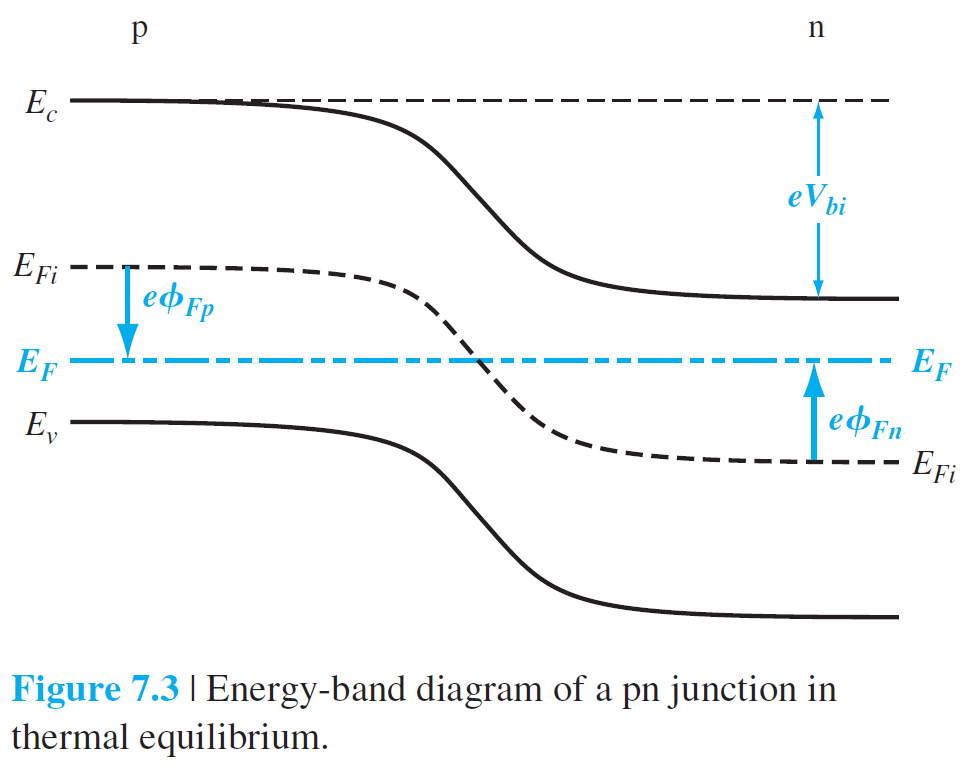

**Electric Field**

$$
\mathrm{E}=\frac{-e N_a}{\epsilon_s}\left(x+x_p\right), \quad-x_p \leq x \leq 0
$$

$$
\mathrm{E}=\frac{-e N_d}{\epsilon_s}\left(x_n-x\right), \quad 0 \leq x \leq x_n
$$

$$
N_a x_p = N_d x_n
$$

$$
V_{b i}=\left|\phi\left(x=x_n\right)\right|=\frac{e}{2 \epsilon_s}\left(N_d x_n^2+N_a x_p^2\right)
$$

**Space Charge Width**

$$
x_n=\left\{\frac{2 \epsilon_s V_{b i}}{e}\left[\frac{N_a}{N_d}\right]\left[\frac{1}{N_a+N_d}\right]\right\}^{1 / 2}
$$

$$
x_p=\left\{\frac{2 \epsilon_s V_{b i}}{e}\left[\frac{N_d}{N_a}\right]\left[\frac{1}{N_a+N_d}\right]\right\}^{1 / 2}
$$

$$
W = \left\{\frac{2 \epsilon_s V_{b i}}{e}\left[\frac{N_a+N_d}{N_aN_d}\right]\right\}^{1 / 2}
$$

In [2]:
epsilon_s = 11.7 * const.epsilon_0 / 100
const.epsilon_0

# def mid2_1c():
#     Na = 4e17
#     Nd = 4e16
#     V = const.k * 300 / const.e * math.log(Na * Nd / n_i ** 2)
#     print(V)
#     W = math.sqrt(2 * epsilon_s * V / const.e * (Na + Nd) / (Na * Nd))
#     print(f"{W:e}")
#     C = math.sqrt(const.e * epsilon_s * Na * Nd / ( 2* V * (Na + Nd)))
#     print(f"{C:e}")

# mid2_1c()

def mid2_3():
    Na = 5e16
    Nd = 1.5e16
    V = const.k * 300 / const.e * math.log(Na * Nd / n_i ** 2)
    print(V, V*0.8)
    W = math.sqrt(2 * epsilon_s * V / const.e * (Na + Nd) / (Na * Nd))
    print(f"{W:e}")
    C = math.sqrt(const.e * epsilon_s * Na * Nd / ( 2* V * (Na + Nd)))
    print(f"{C:e}")

mid2_3()

NameError: name 'const' is not defined

### Reverse Applied Bias

$$
V_{total} = |\phi_{Fn}| + |\phi_{Fp}| +V_R = V_{bi} + V_R
$$

$$
W = \left\{\frac{2 \epsilon_s (V_{b i} + V_R)}{e}\left[\frac{N_a+N_d}{N_aN_d}\right]\right\}^{1 / 2}
$$

$$
E_{max} = -\left\{\frac{2 e (V_{b i} + V_R)}{\epsilon_s}\left[\frac{N_aN_d}{N_a+N_d}\right]\right\}^{1 / 2} = - \frac{2(V_{bi} + V_R)}{W}
$$


**Junction Capacitance**
$$
C^{\prime}=\left\{\frac{e \epsilon_s N_a N_d}{2\left(V_{b i}+V_R\right)\left(N_a+N_d\right)}\right\}^{1 / 2}
$$

### One-Sided Junctions
Consider a special pn junction called the one-sided junction. If, for example, $N_a \gg$ $N_d$, this junction is referred to as a $\mathrm{p}^{+} \mathrm{n}$ junction. The total space charge width reduces to
$$
W \approx\left\{\frac{2 \epsilon_s\left(V_{b i}+V_R\right)}{e N_d}\right\}^{1 / 2}
$$
Considering the expressions for $x_n$ and $x_p$, we have for the $\mathrm{p}^{+} \mathrm{n}$ junction
$$
x_p \ll x_n
$$
and
$$
W \approx x_n
$$
Almost the entire space charge layer extends into the low-doped region of the junction.
The junction capacitance of the $\mathrm{p}^{+} \mathrm{n}$ junction reduces to
$$
C^{\prime} \approx\left\{\frac{e \epsilon_s N_d}{2\left(V_{b i}+V_R\right)}\right\}^{1 / 2}
$$

## Chapter 8 The pn Junction Diode

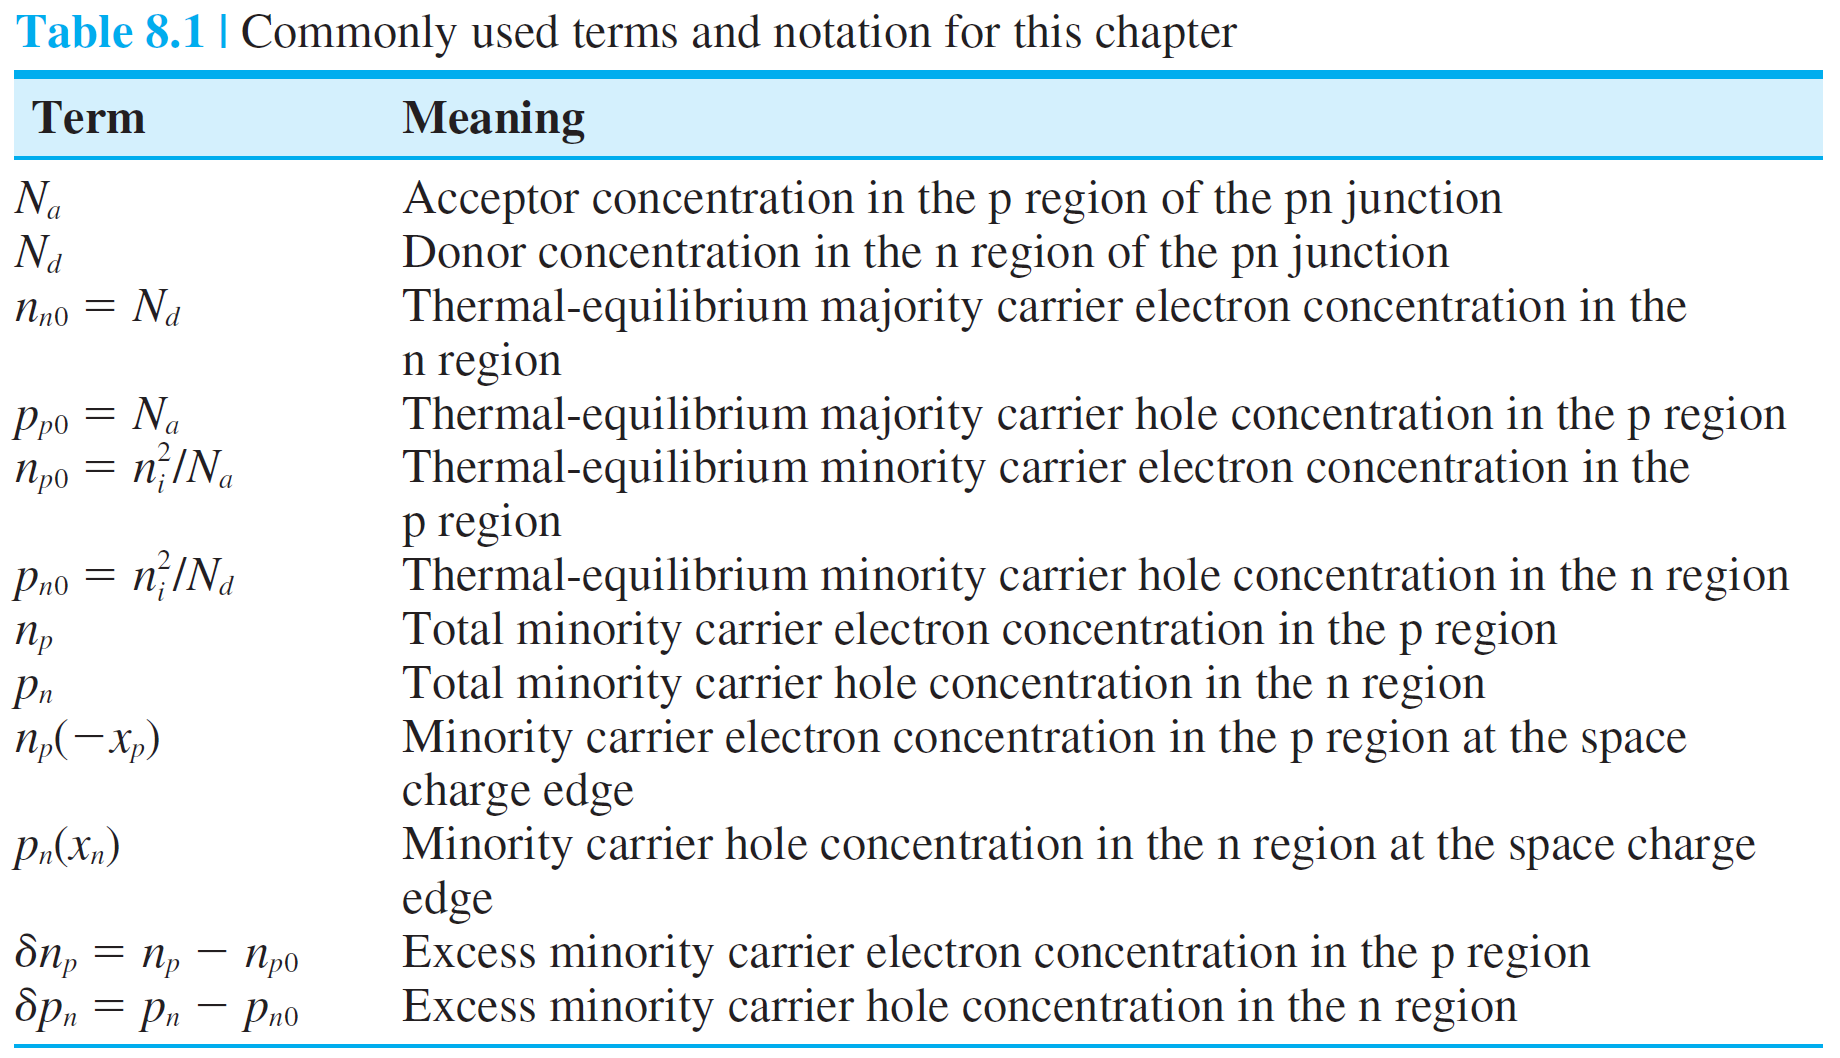

**Zero Bias**

$$
n_{p0} = n_{n0} \exp \left(\frac{-eV_{bi}}{kT}\right)
$$

**Forward Bias $V_a$**

$$
n_{p} = n_{p0} \exp \left(\frac{eV_{a}}{kT}\right)
$$

$$
p_{n} = p_{n0} \exp \left(\frac{eV_{a}}{kT}\right)
$$

### Steady State, No Electric Field, No Excess Carrier Generation

The excess carrier concentrations are then found to be
$$
\delta p_n(x)=p_n(x)-p_{n 0}=p_{n 0}\left[\exp \left(\frac{e V_a}{k T}\right)-1\right] \exp \left(\frac{x_n-x}{L_p}\right), \; \text{where} \; \left(x \geq x_n\right)
$$

$$
\delta n_p(x)=n_p(x)-n_{p 0}=n_{p 0}\left[\exp \left(\frac{e V_a}{k T}\right)-1\right] \exp \left(\frac{x_p+x}{L_n}\right), \; \text{where} \; \left(x \leq-x_p\right)
$$

$$
L^2_n = D_n\tau_{n0}, \; L^2_p = D_p \tau_{p0}
$$

### Ideal pn Junction Current

$$
J_p\left(x_n\right)=\frac{e D_p p_{n 0}}{L_p}\left[\exp \left(\frac{e V_a}{k T}\right)-1\right]
$$

$$
J_n\left(-x_p\right)=\frac{e D_n n_{p 0}}{L_n}\left[\exp \left(\frac{e V_a}{k T}\right)-1\right]
$$

**Total Current**

$$
J = J_s\left[\exp \left(\frac{e V_a}{k T}\right)-1\right]
$$

**Reverse-Saturation Current Density**
$$
J_s = \left[\frac{e D_p p_{n0}}{L_p} + \frac{e D_n n_{p0}}{L_n}\right]
$$

In [105]:
A = 5e-4
Isp = const.e * Dp * n_i ** 2 / 1.5e16 / math.sqrt(Dp * 8e-8) * A * (math.exp(const.e * 0.596 / const.k / 300) -1)
print(f"{Isp:e}")
Isn = const.e * Dn * n_i ** 2 / 5e16 / math.sqrt(Dn * 2e-7) * A * (math.exp(const.e * 0.596 / const.k / 300) -1)
print(f"{Isn:e}")

1.405604e-04
4.619287e-05


### Generation-Recombination Currents


**Reverse-Biased Generation Current**
$$
J_{gen} = \frac{en_iW}{2\tau_0}
$$

**Total Reverse-Biased Current Density**
$$
J_R = J_s + J_{gen}
$$

**Forward-Bias Recombination Current**
$$
J_{\text {rec }}=\frac{e W n_i}{2 \tau_0} \left[\exp \left(\frac{e V_a}{2 k T}\right)- 1\right]=J_{r 0} \exp \left[\left(\frac{e V_a}{2 k T}\right) - 1\right]
$$

**Total Forward-Bias Current Density**
$$
J = J_{rec} + J_D = \frac{e W n_i}{2 \tau_0} \left[\exp \left(\frac{e V_a}{2 k T}\right)- 1\right] + J_s \left[\exp \left(\frac{eV_a}{kT}\right)-1\right]
$$

When $V_a \gg \frac{kT}{e}$,
$$
J = J_{rec} + J_D = \frac{e W n_i}{2 \tau_0} \exp \left(\frac{e V_a}{2 k T}\right) + J_s \exp \left(\frac{eV_a}{kT}\right)
$$

### High-Level Injection

$$
\delta n=\delta p \cong n_i \exp \left(\frac{V_a}{2 V_t}\right)
$$

$$
I \propto \exp \left(\frac{V_a}{2 V_t}\right)
$$

0.025851999786435535
